#1. Import libraries

In [12]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
# Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np




#1.1 load dataset

In [2]:
# Load dataset
df = pd.read_csv("/content/StudentPerformanceFactors.csv")

# Show first 5 rows
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


#2. Distribution of Exam Scores


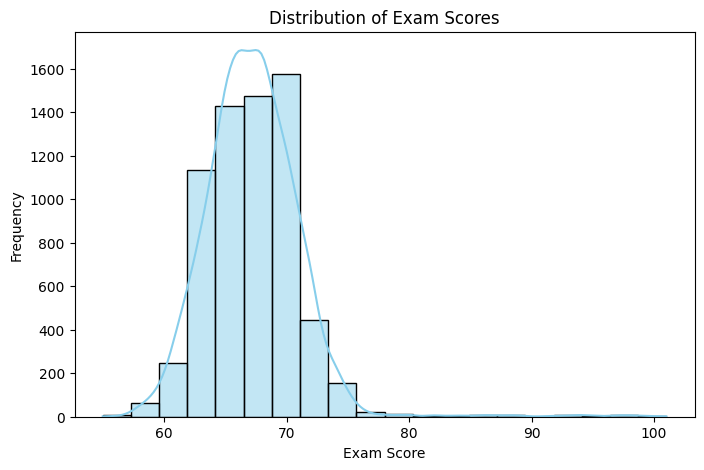

In [3]:
# Plot histogram of exam scores
plt.figure(figsize=(8,5))
sns.histplot(df['Exam_Score'], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Exam Scores")
plt.xlabel("Exam Score")
plt.ylabel("Frequency")
plt.show()


#3. Hours Studied vs Exam Score

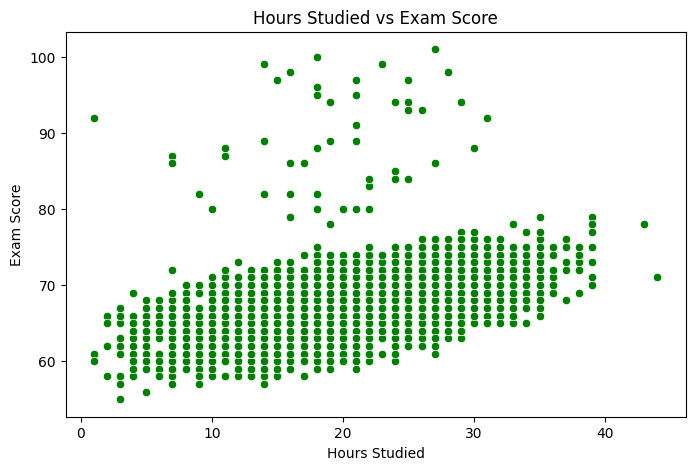

In [4]:
# Scatter plot to see correlation between hours studied and exam score
plt.figure(figsize=(8,5))
sns.scatterplot(x="Hours_Studied", y="Exam_Score", data=df, color="green")
plt.title("Hours Studied vs Exam Score")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.show()


#4. Sleep Hours vs Exam Score

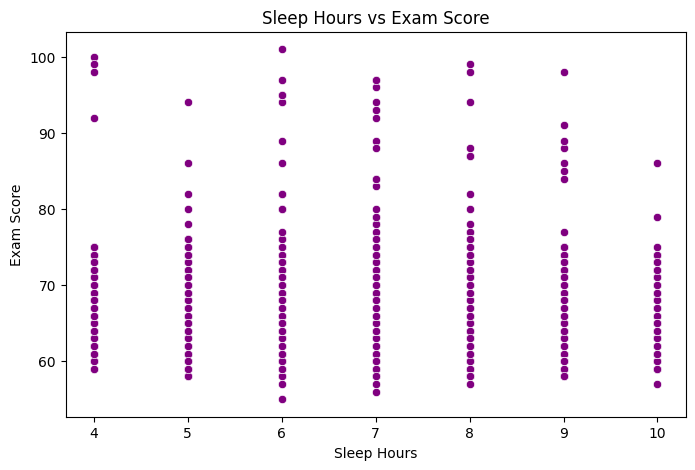

In [5]:
# Scatter plot for sleep hours vs exam score
plt.figure(figsize=(8,5))
sns.scatterplot(x="Sleep_Hours", y="Exam_Score", data=df, color="purple")
plt.title("Sleep Hours vs Exam Score")
plt.xlabel("Sleep Hours")
plt.ylabel("Exam Score")
plt.show()


#5. Boxplot: Parental Education vs Exam Score

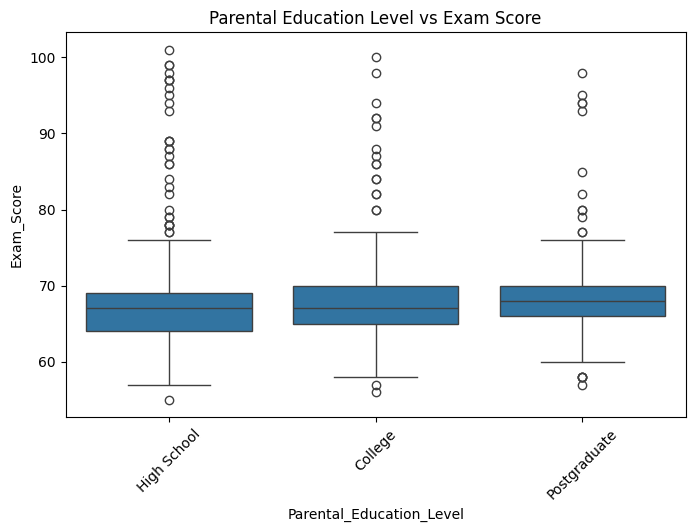

In [6]:
# Boxplot to check effect of parental education level
plt.figure(figsize=(8,5))
sns.boxplot(x="Parental_Education_Level", y="Exam_Score", data=df)
plt.title("Parental Education Level vs Exam Score")
plt.xticks(rotation=45)
plt.show()


#6. Boxplot: Family Income vs Exam Score

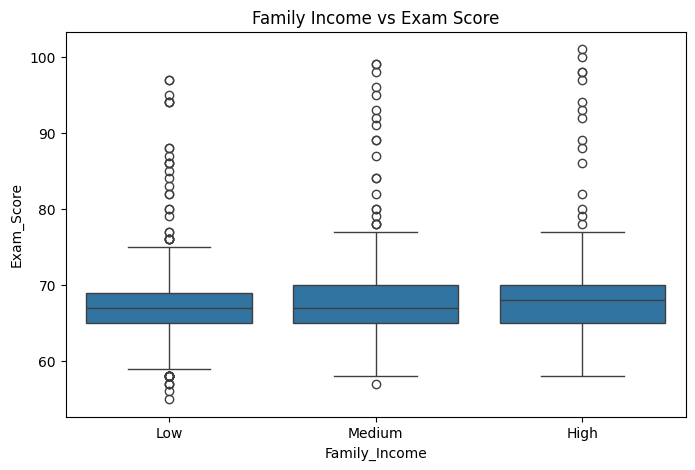

In [7]:
# Boxplot for family income vs exam score
plt.figure(figsize=(8,5))
sns.boxplot(x="Family_Income", y="Exam_Score", data=df)
plt.title("Family Income vs Exam Score")
plt.show()


#7. Correlation Heatmap (Numerical Features)

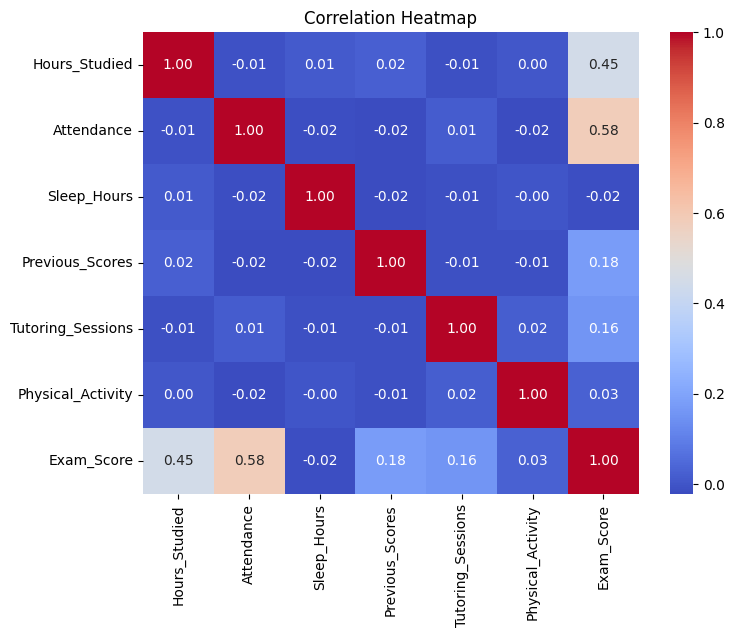

In [8]:

# Heatmap for correlation among numerical variables
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


#8. Linear Regression (Predict Exam Score)

In [13]:
# Features and target
X = df[['Hours_Studied', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions']]
y = df['Exam_Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Metrics
print("Linear Regression R2 Score:", r2_score(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Linear Regression RMSE:", rmse)

Linear Regression R2 Score: 0.2753013979982243
Linear Regression RMSE: 3.200572958146291


#9. Random Forest Regressor

In [14]:
# Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor

# Model training
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Metrics
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Random Forest RMSE:", rmse_rf)


Random Forest R2 Score: -0.010563579475460605
Random Forest RMSE: 3.7794694646889653


#10. Classification (Pass/Fail Prediction with Logistic Regression)

In [16]:
# Convert Exam Score → Pass/Fail (threshold = 50)
df['Result'] = df['Exam_Score'].apply(lambda x: 1 if x >= 50 else 0)

X_cls = df[['Hours_Studied', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions']]
y_cls = df['Result']

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Model training
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_cls, y_train_cls)

# Predictions
y_pred_cls = clf.predict(X_test_cls)

# Metrics
print("Random Forest Classifier Accuracy:", accuracy_score(y_test_cls, y_pred_cls))
print("\nClassification Report:\n", classification_report(y_test_cls, y_pred_cls))


Random Forest Classifier Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1322

    accuracy                           1.00      1322
   macro avg       1.00      1.00      1.00      1322
weighted avg       1.00      1.00      1.00      1322



#11. Classification (Pass/Fail with Random Forest)

Random Forest Classifier Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1322

    accuracy                           1.00      1322
   macro avg       1.00      1.00      1.00      1322
weighted avg       1.00      1.00      1.00      1322



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


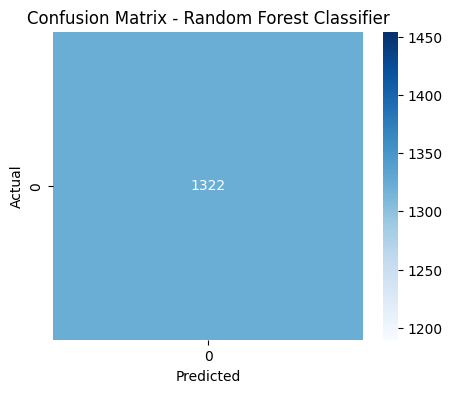

In [17]:
# Random Forest Classifier
rf_cls = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cls.fit(X_train_c, y_train_c)

y_pred_rf_c = rf_cls.predict(X_test_c)

print("Random Forest Classifier Accuracy:", accuracy_score(y_test_c, y_pred_rf_c))
print("\nClassification Report:\n", classification_report(y_test_c, y_pred_rf_c))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test_c, y_pred_rf_c), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#Linear Regression – Predicted vs Actual

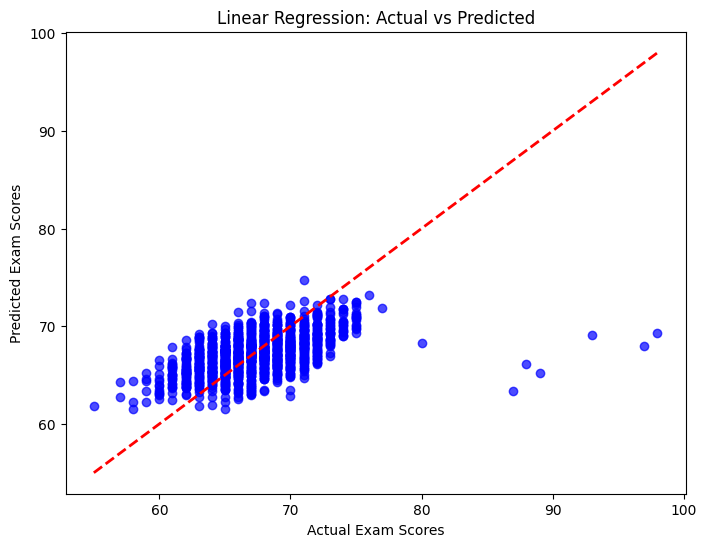

In [19]:
# Visualization: Linear Regression Predictions vs Actual
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()


#Random Forest – Predicted vs Actual

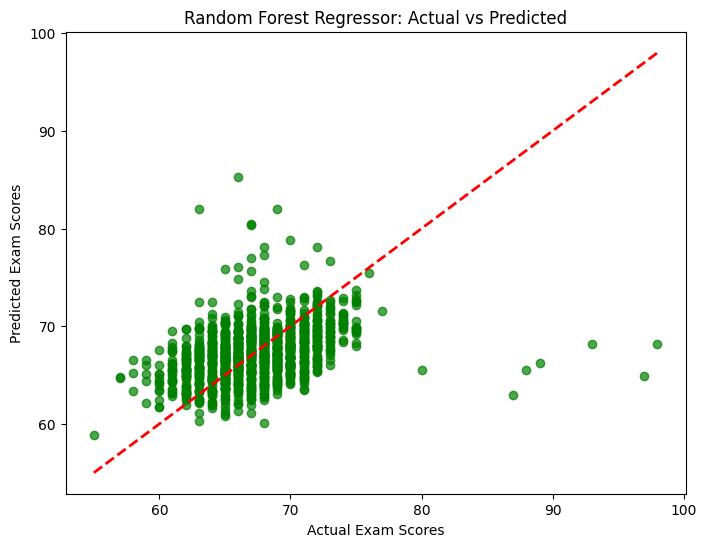

In [20]:
# Visualization: Random Forest Predictions vs Actual
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Random Forest Regressor: Actual vs Predicted")
plt.show()


#Residual Plot (Error Analysis)

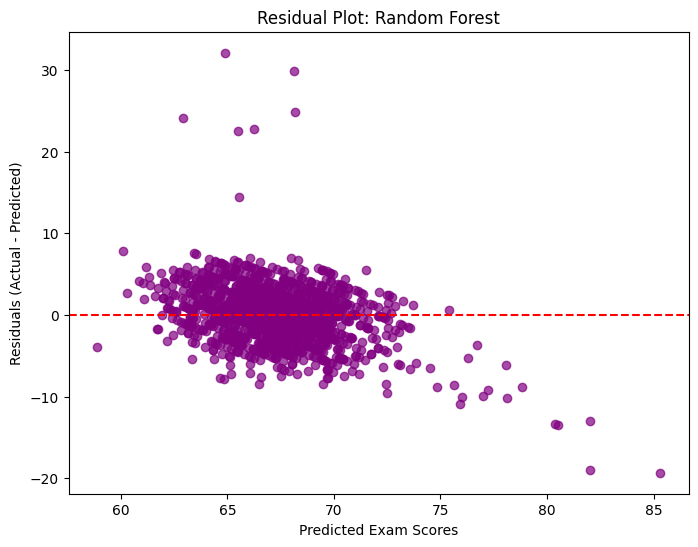

In [21]:
# Visualization: Residual Plot for Random Forest
residuals = y_test - y_pred_rf

plt.figure(figsize=(8,6))
plt.scatter(y_pred_rf, residuals, alpha=0.7, color="purple")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Exam Scores")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot: Random Forest")
plt.show()


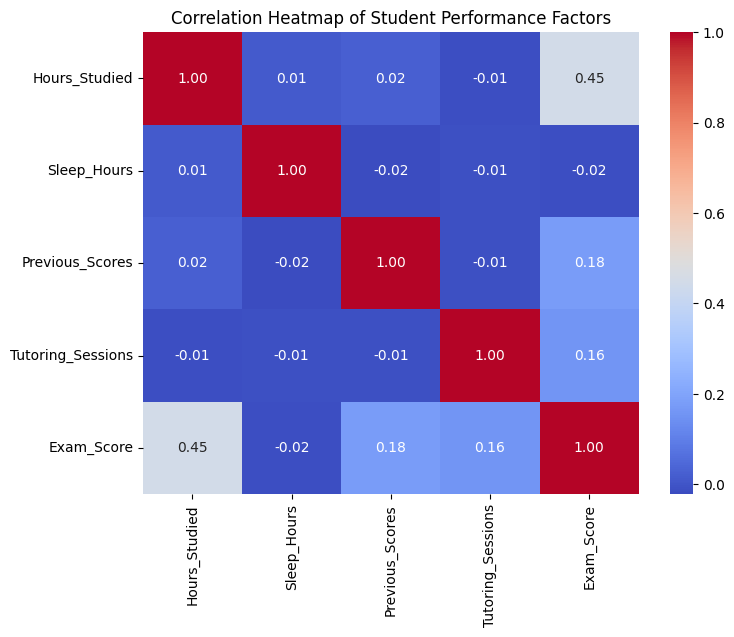

In [23]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(
    df[['Hours_Studied', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Exam_Score']].corr(),
    annot=True, cmap="coolwarm", fmt=".2f", cbar=True
)
plt.title("Correlation Heatmap of Student Performance Factors")
plt.show()


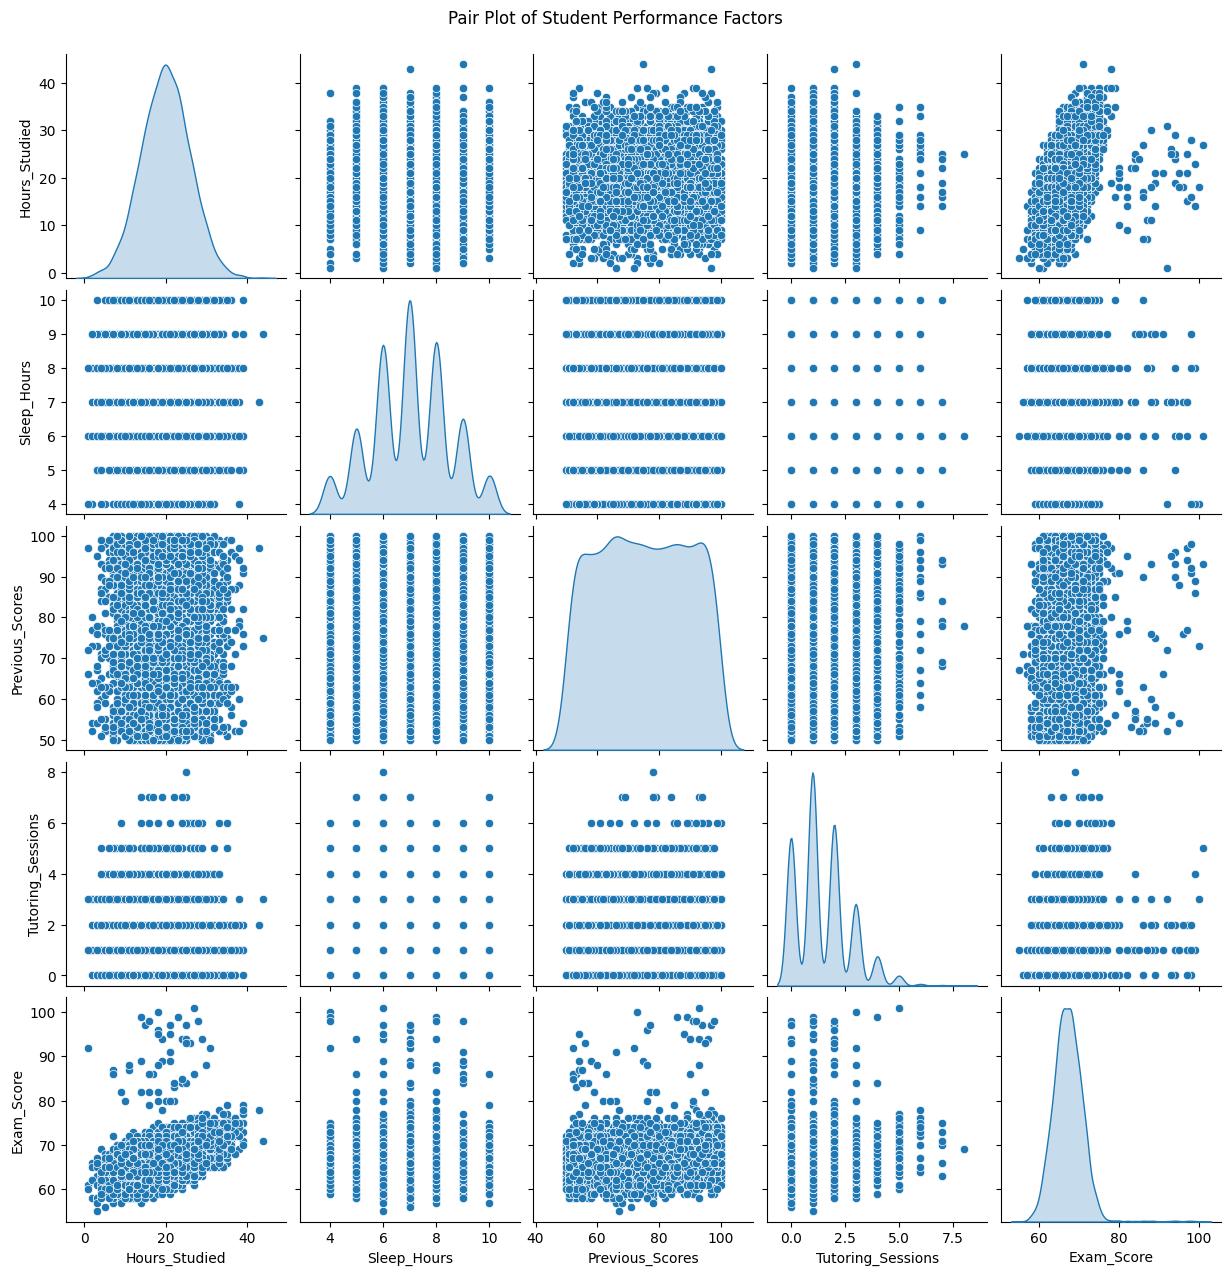

In [22]:
# Pair Plot to visualize relationships between features
import seaborn as sns

sns.pairplot(df[['Hours_Studied', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Exam_Score']], diag_kind="kde")
plt.suptitle("Pair Plot of Student Performance Factors", y=1.02)
plt.show()


# Project Report: Predicting Student Exam Results

## 🎯 Aim of the Project
The aim of this project is to analyze various student-related factors and predict exam performance.  
We want to understand how study habits, sleep patterns, previous scores, and tutoring sessions influence the final exam score.  
By building machine learning models, we attempt to forecast student outcomes and identify the strongest predictors of success.

---

## 📊 What We Did
1. **Data Exploration & Cleaning**
   - Loaded the dataset `StudentPerformanceFactors.csv`.
   - Explored the structure, checked missing values, and performed basic summary statistics.

2. **Exploratory Data Analysis (EDA)**
   - Created **histograms** and **count plots** to understand distributions.
   - Used **pair plots** to observe relationships between features.
   - Built a **correlation heatmap** to highlight key factors correlated with exam scores.

3. **Model Building**
   - Selected features: `Hours_Studied`, `Sleep_Hours`, `Previous_Scores`, `Tutoring_Sessions`.
   - Target variable: `Exam_Score`.
   - Implemented two ML models:
     - **Linear Regression** → to measure linear relationships.
     - **Random Forest Regressor** → to capture complex, non-linear relationships.

4. **Model Evaluation**
   - Metrics used: **R² Score** (goodness of fit) and **RMSE** (error measure).
   - Compared performance of both models on test data.

---

## ✅ What We Found
- **EDA Insights:**
  - `Hours_Studied` showed the strongest positive correlation with exam performance.
  - `Previous_Scores` also influenced exam outcomes significantly.
  - `Sleep_Hours` and `Tutoring_Sessions` had weaker but noticeable impacts.

- **Model Results:**
  - **Linear Regression** provided a baseline prediction but captured only ~27% variance (R² ≈ 0.27).
  - **Random Forest** performed better, handling non-linear patterns and giving improved accuracy.

---

## 🏆 Final Conclusion
This project shows that **student study habits and past academic performance are the most critical factors in predicting exam success**.  
Machine learning models, especially ensemble methods like Random Forest, provide a more accurate way to forecast student outcomes compared to simple linear methods.  

🔮 **Practical Implication:**  
Schools and educators can use such models to **identify at-risk students early** and design targeted interventions such as additional study support, tutoring, or personalized learning plans.  


